In [1]:
import geopandas as gpd
import pyogrio as ogr

In [2]:
precincts = gpd.read_file(
    "/Users/mariogiampieri/Dropbox (Personal)/districtr_data/co_precincts_wgs.fgb"
)
blocks = gpd.read_file(
    "/Users/mariogiampieri/Dropbox (Personal)/districtr_data/co_tabblock20_wgs.fgb"
)

In [3]:
# for each precinct, get all intersecting blocks

precincts["block_indices"] = precincts.geometry.apply(
    lambda x: blocks[blocks.intersects(x)].index
)

In [4]:
precincts["block_indices"]

0       Int64Index([ 27,  28,  29,  30,  33,  35,  36,...
1       Int64Index([ 45,  49, 129, 130, 131, 132, 133,...
2       Int64Index([ 121,  122,  123,  137,  138,  139...
3       Int64Index([ 317,  318,  319,  320,  321,  343...
4       Int64Index([ 35,  36,  39,  40,  41,  42,  43,...
                              ...                        
3130    Int64Index([139567, 139677, 139680, 139681, 13...
3131    Int64Index([139333, 139334, 139723, 139724, 13...
3132    Int64Index([139167, 139171, 139172, 139173, 13...
3133    Int64Index([136616, 136620, 136621, 136622, 13...
3134    Int64Index([139139, 139142, 139143, 139144, 13...
Name: block_indices, Length: 3135, dtype: object

<AxesSubplot: >

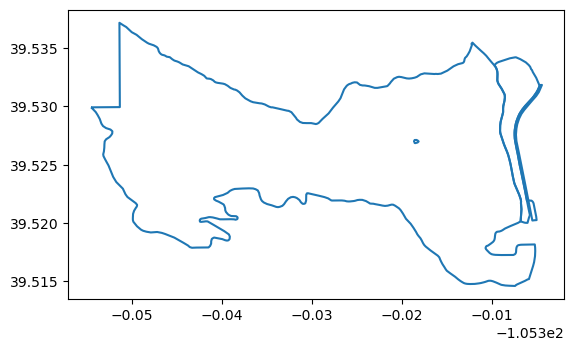

In [5]:
blocks.boundary.loc[[63922, 63925, 63926, 63927]].plot()

     COUNTYFP   VTDST        NAME CD116FP SLDUST SLDLST      PRECID  AG18D  \
1468      031  031650  Denver 650      01    031    006  1310616650    600   

      AG18R  SOS18D  ...  HVAP  WVAP  BVAP  AMINVAP  ASIANVAP  NHPIVAP  \
1468    204     590  ...   271  1004   193        7        36        0   

      OTHERVAP  2MOREVAP                                           geometry  \
1468         5        17  MULTIPOLYGON (((-104.90355 39.69886, -104.9035...   

                                          block_indices  
1468  Int64Index([70334, 70416, 70419, 70420, 70421,...  

[1 rows x 46 columns]
[70334, 70416, 70419, 70420, 70421, 70422, 70423, 70424, 70425, 70426, 70427, 70428, 70429, 70430, 70431, 70432, 70433, 70434, 70435, 70436, 70437, 70446, 70447, 70449, 83024]


<AxesSubplot: >

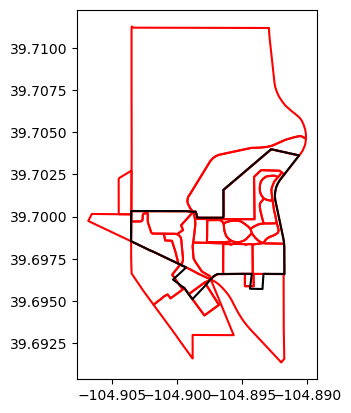

In [6]:
s = precincts.sample(1)
ixs = [x for idx in s["block_indices"].tolist() for x in idx.tolist()]
print(s)
print(ixs)

ax = blocks.boundary.loc[ixs].plot(color="red")
s.boundary.plot(
    color="black",
    ax=ax,
)

In [7]:
precincts["block_indices"] = precincts["block_indices"].apply(lambda x: x.tolist())

In [11]:
ogr.write_dataframe(
    precincts[["NAME", "block_indices", "geometry"]],
    "/Users/mariogiampieri/Dropbox (Personal)/districtr_data/co_precincts_block_indices_intersect_wgs.geojson",
)

In [17]:
# blocks[["GEOID20", "geometry"]].to_file(
#     "/Users/mariogiampieri/Dropbox (Personal)/districtr_data/co_tabblock20_wgs_simple.fgb"
# )

ogr.write_dataframe(
    blocks[["GEOID20", "geometry"]],
    "/Users/mariogiampieri/Dropbox (Personal)/districtr_data/co_tabblock20_wgs_simple.fgb",
)